In [10]:
!pip install prophet ipywidgets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df = pd.read_csv('/home/hardikprakash/Projects/medium/prophet/datasets/raw/Electric_Production.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [3]:
df.rename(columns={'DATE': 'ds', 'IPG2211A2N': 'y'}, inplace=True)
df.isna().sum()

ds    0
y     0
dtype: int64

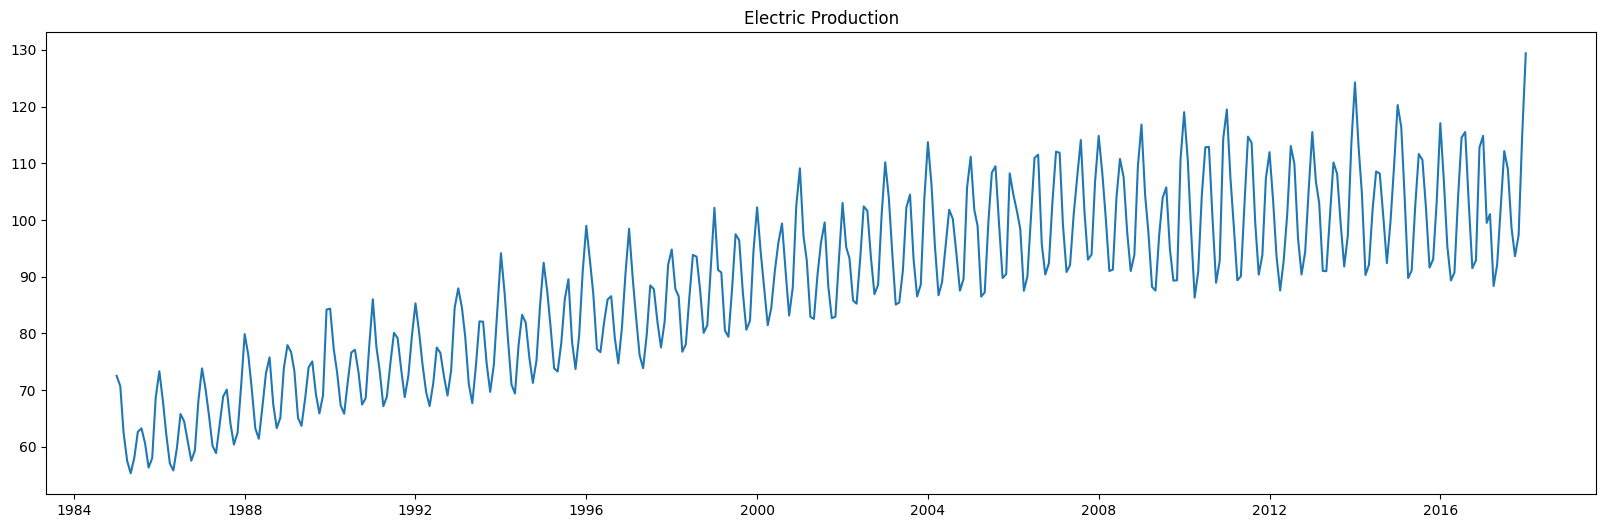

In [4]:
fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(df['ds'], df['y'])
plt.title('Electric Production')
plt.show()

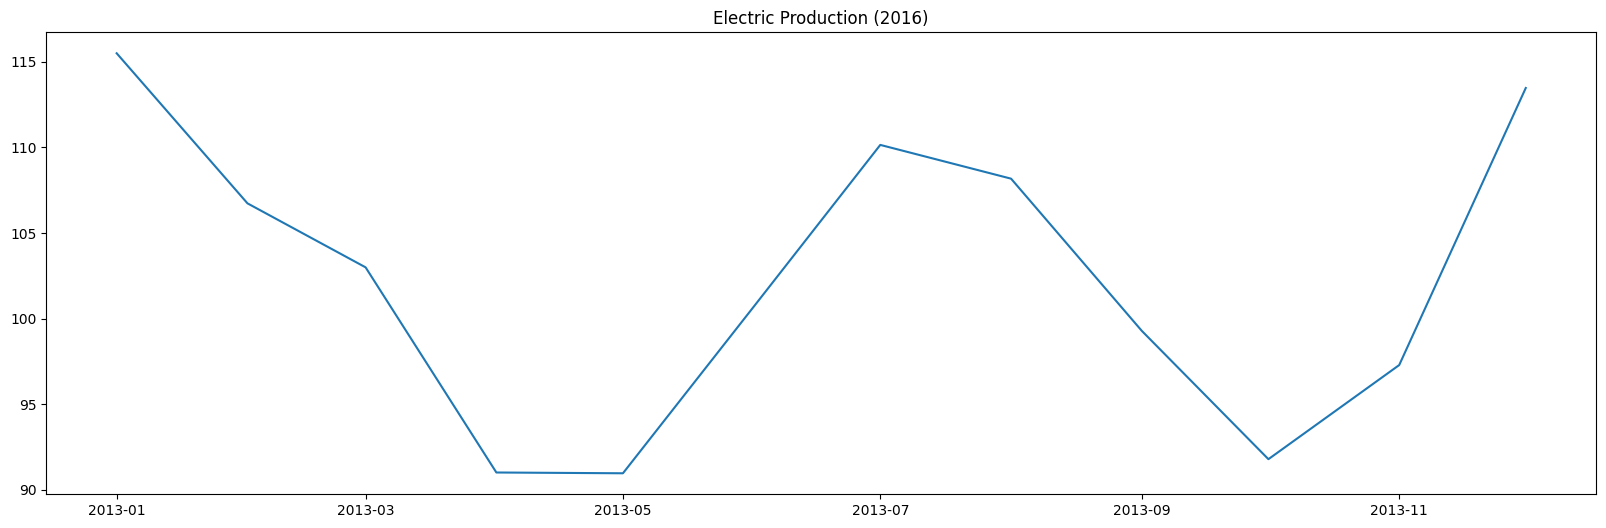

In [15]:
start_date = '2013-01-01'
end_date = '2013-12-31'

df_filtered = df[(df['ds'] >= start_date) & (df['ds'] <= end_date)]

fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(df_filtered['ds'], df_filtered['y'],)
plt.title('Electric Production (2016)')
plt.show()

14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing


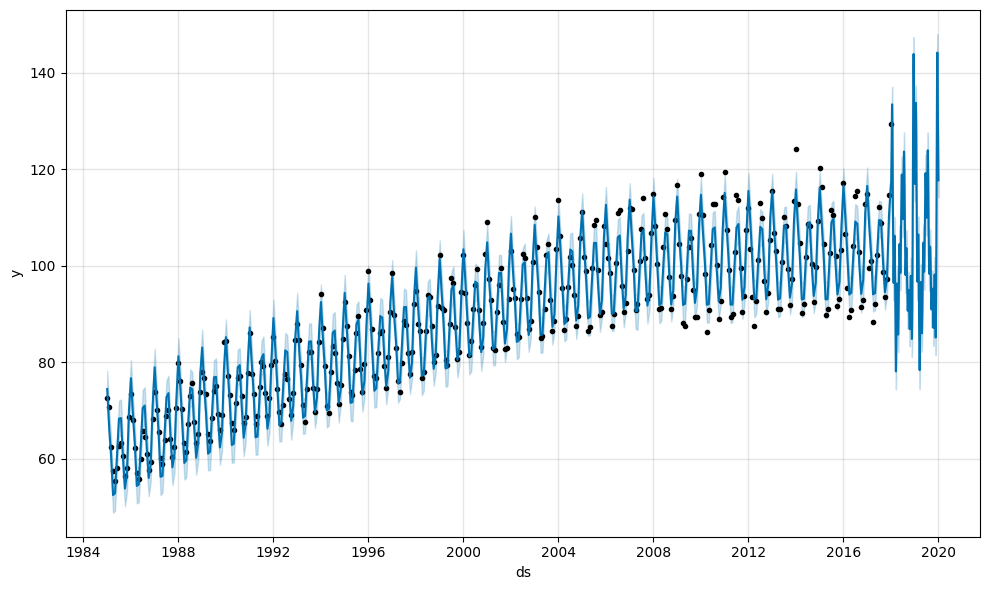

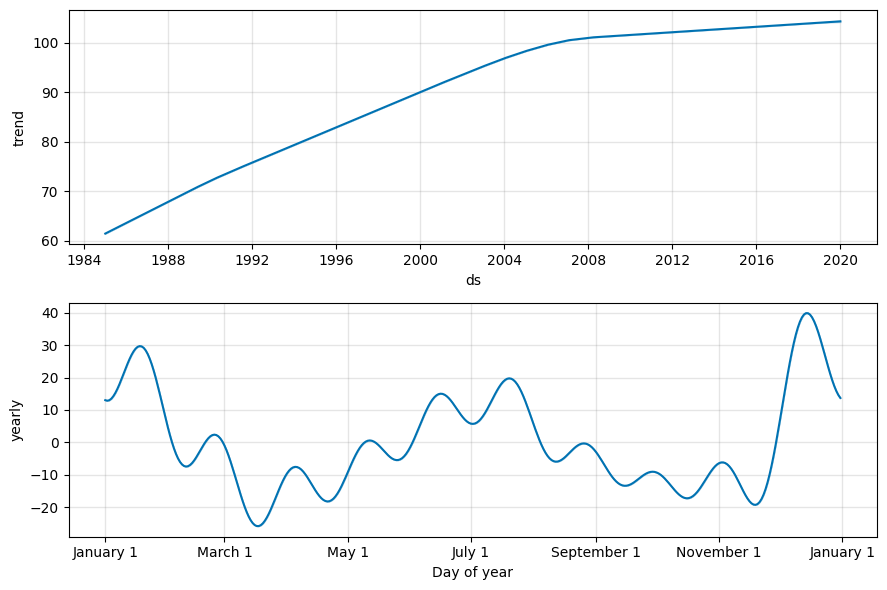

In [6]:
model = Prophet()

model.fit(df)

# Create future dates
future = model.make_future_dataframe(periods=730)

# Forecast
forecast = model.predict(future)

# Plot forecast
model.plot(forecast);

fig2 = model.plot_components(forecast)

14:28:04 - cmdstanpy - INFO - Chain [1] start processing
14:28:04 - cmdstanpy - INFO - Chain [1] done processing


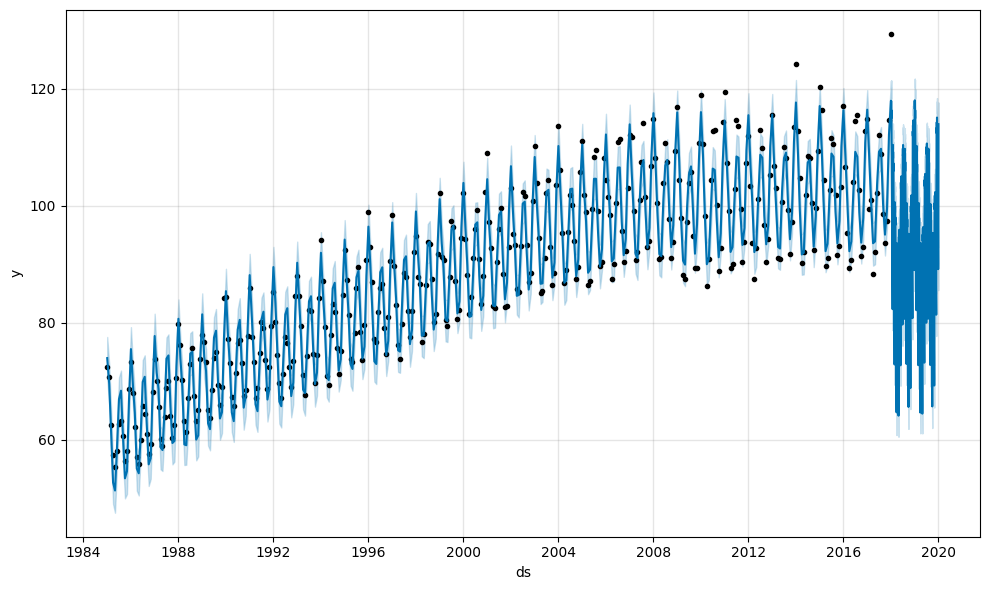

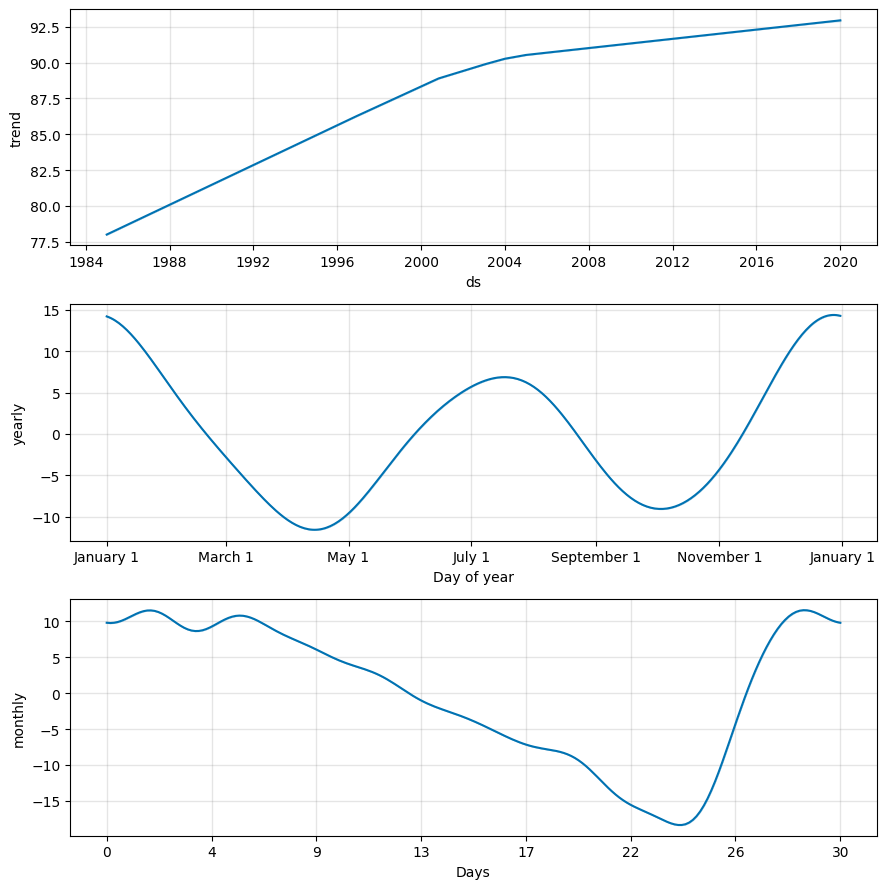

In [ ]:
# model = Prophet(changepoint_prior_scale=0.1, interval_width=0.8, yearly_seasonality=False)
model = Prophet()

model.add_seasonality(name='yearly', period=365, fourier_order=5)
# model.add_seasonality(name='monthly', period=30.5, fourier_order=10)


model.fit(df)

# Create future dates
future = model.make_future_dataframe(periods=730)

# Forecast
forecast = model.predict(future)

# Plot forecast
model.plot(forecast);

fig2 = model.plot_components(forecast)

In [8]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)

  0%|          | 0/61 [00:00<?, ?it/s]

14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1]

In [9]:
def evaluate_changepoint_prior(data,changepoint_priors=[0.05]):
    for i in changepoint_priors:
        model = Prophet(changepoint_prior_scale=i, interval_width=0.8)
        model.fit(data)


horizon      rmse      mape
0    37 days  4.048382  0.032794
1    38 days  3.876200  0.031713
2    39 days  3.873959  0.031618
3    40 days  3.949484  0.032325
4    41 days  3.958181  0.032649
..       ...       ...       ...
296 361 days  3.614103  0.029402
297 362 days  3.619944  0.029575
298 363 days  3.599341  0.029430
299 364 days  3.617952  0.029764
300 365 days  3.805759  0.030626

[301 rows x 3 columns]